In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt

Dataset from https://www.mldata.io/dataset-details/school_grades/

In [2]:
grades = pd.read_csv('school_grades_dataset.csv')
grades.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


In [3]:
grades.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 33 columns):
school        649 non-null object
sex           649 non-null object
age           649 non-null int64
address       649 non-null object
famsize       649 non-null object
Pstatus       649 non-null object
Medu          649 non-null int64
Fedu          649 non-null int64
Mjob          649 non-null object
Fjob          649 non-null object
reason        649 non-null object
guardian      649 non-null object
traveltime    649 non-null int64
studytime     649 non-null int64
failures      649 non-null int64
schoolsup     649 non-null object
famsup        649 non-null object
paid          649 non-null object
activities    649 non-null object
nursery       649 non-null object
higher        649 non-null object
internet      649 non-null object
romantic      649 non-null object
famrel        649 non-null int64
freetime      649 non-null int64
goout         649 non-null int64
Dalc          649 no

In [4]:
grades.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000
mean,16.744222,2.514638,2.306626,1.568567,1.930663,0.221880,3.930663,3.180277,3.184900,1.502311,2.280431,3.536210,3.659476,11.399076,11.570108,11.906009
std,1.218138,1.134552,1.099931,0.748660,0.829510,0.593235,0.955717,1.051093,1.175766,0.924834,1.284380,1.446259,4.640759,2.745265,2.913639,3.230656
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,16.000000,2.000000,1.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,2.000000,0.000000,10.000000,10.000000,10.000000
50%,17.000000,2.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,11.000000,11.000000,12.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,32.000000,19.000000,19.000000,19.000000


In [5]:
grades.describe(include='object')

,school,sex,address,famsize,Pstatus,Mjob,Fjob,reason,guardian,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic
count,649,649,649,649,649,649,649,649,649,649,649,649,649,649,649,649,649
unique,2,2,2,2,2,5,5,4,3,2,2,2,2,2,2,2,2
top,GP,F,U,GT3,T,other,other,course,mother,no,yes,no,no,yes,yes,yes,no
freq,423,383,452,457,569,258,367,285,455,581,398,610,334,521,580,498,410


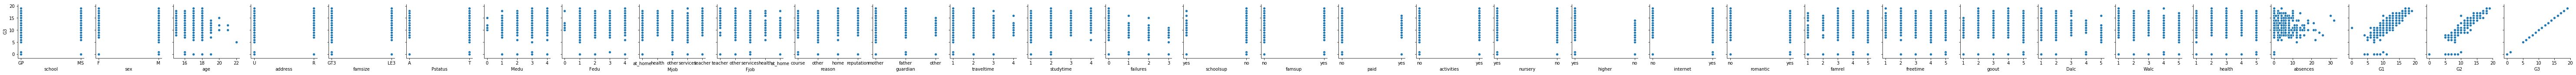

In [6]:
sns.pairplot(data=grades, y_vars=['G3'], x_vars=list(grades))

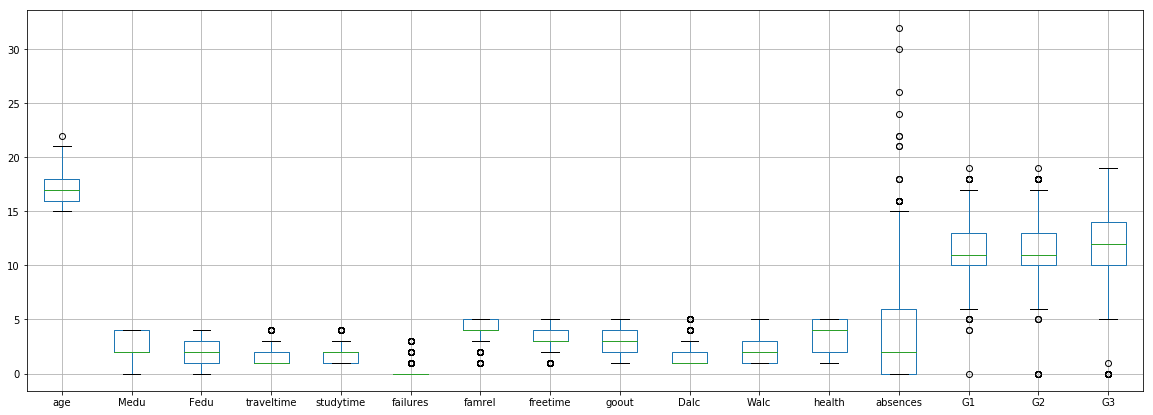

In [7]:
plt.figure(figsize=(20,7))
grades.boxplot()

In [8]:
X = grades[['G1', 'G2']]
y = grades[['G3']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
regr = LinearRegression()
regr.fit(X_train, y_train)
y_pred = regr.predict(X_test)

In [10]:
# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print(f"Mean squared error:{mean_squared_error(y_test, y_pred): .2f}")
print(f"Root Mean squared error: {sqrt(mean_squared_error(y_test, y_pred)) :.2f}")
# Explained variance score: 1 is perfect prediction
print(f'Variance score: {r2_score(y_test, y_pred):.2f}')

Coefficients: 
 [[0.1881616  0.88218903]]
Mean squared error: 1.37
Root Mean squared error: 1.17
Variance score: 0.86


In [11]:
df = grades._get_numeric_data()
df.head()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,18,4,4,2,2,0,4,3,4,1,1,3,4,0,11,11
1,17,1,1,1,2,0,5,3,3,1,1,3,2,9,11,11
2,15,1,1,1,2,0,4,3,2,2,3,3,6,12,13,12
3,15,4,2,1,3,0,3,2,2,1,1,5,0,14,14,14
4,16,3,3,1,2,0,4,3,2,1,2,5,0,11,13,13


In [12]:
X = df.drop(columns='G3')
y = grades[['G3']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lasso = Lasso()
lasso.fit(X_train, y_train)
y_pred = lasso.predict(X_test)

In [13]:
# The coefficients
print('Coefficients: \n', lasso.coef_)
# The mean squared error
print(f"Mean squared error:{mean_squared_error(y_test, y_pred): .2f}")
print(f"Root Mean squared error: {sqrt(mean_squared_error(y_test, y_pred)) :.2f}")
# Explained variance score: 1 is perfect prediction
print(f'Variance score: {r2_score(y_test, y_pred):.2f}')

Coefficients: 
 [-0.          0.          0.         -0.          0.         -0.
 -0.         -0.         -0.         -0.         -0.         -0.
  0.          0.08172224  0.84576295]
Mean squared error: 1.29
Root Mean squared error: 1.13
Variance score: 0.87


In [14]:
regr = LinearRegression()
regr.fit(X_train, y_train)
y_pred = regr.predict(X_test)

# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print(f"Mean squared error:{mean_squared_error(y_test, y_pred): .2f}")
print(f"Root Mean squared error: {sqrt(mean_squared_error(y_test, y_pred)) :.2f}")
# Explained variance score: 1 is perfect prediction
print(f'Variance score: {r2_score(y_test, y_pred):.2f}')

Coefficients: 
 [[ 0.01999825 -0.0670302   0.02715153  0.06171074  0.10143493 -0.16047327
  -0.06272858 -0.07702052  0.02655272 -0.09572602  0.01598035 -0.02724112
   0.02610804  0.18820145  0.87043897]]
Mean squared error: 1.36
Root Mean squared error: 1.17
Variance score: 0.86


In [15]:
grades.Mjob.value_counts()

other       258
services    136
at_home     135
teacher      72
health       48
Name: Mjob, dtype: int64

In [16]:
grades.Fjob.value_counts()

other       367
services    181
at_home      42
teacher      36
health       23
Name: Fjob, dtype: int64

In [17]:
pd.get_dummies(grades[['Mjob', 'Fjob']], prefix=['Mjob', 'Fjob']).head()

,Mjob_at_home,Mjob_health,Mjob_other,Mjob_services,Mjob_teacher,Fjob_at_home,Fjob_health,Fjob_other,Fjob_services,Fjob_teacher
0,1,0,0,0,0,0,0,0,0,1
1,1,0,0,0,0,0,0,1,0,0
2,1,0,0,0,0,0,0,1,0,0
3,0,1,0,0,0,0,0,0,1,0
4,0,0,1,0,0,0,0,1,0,0


In [18]:
grades_1hot = pd.read_csv('school_grades_scikit_onehot_dataset.csv')
grades_1hot.head()

,school_1,school_2,sex_1,sex_2,age,address_1,address_2,famsize_1,famsize_2,Pstatus_1,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,1.0,0.0,1.0,0.0,18.0,0.0,1.0,1.0,0.0,1.0,...,4.0,3.0,4.0,1.0,1.0,3.0,4.0,0.0,11.0,11.0
1,1.0,0.0,1.0,0.0,17.0,0.0,1.0,1.0,0.0,0.0,...,5.0,3.0,3.0,1.0,1.0,3.0,2.0,9.0,11.0,11.0
2,1.0,0.0,1.0,0.0,15.0,0.0,1.0,0.0,1.0,0.0,...,4.0,3.0,2.0,2.0,3.0,3.0,6.0,12.0,13.0,12.0
3,1.0,0.0,1.0,0.0,15.0,0.0,1.0,1.0,0.0,0.0,...,3.0,2.0,2.0,1.0,1.0,5.0,0.0,14.0,14.0,14.0
4,1.0,0.0,1.0,0.0,16.0,0.0,1.0,1.0,0.0,0.0,...,4.0,3.0,2.0,1.0,2.0,5.0,0.0,11.0,13.0,13.0


In [19]:
X = grades_1hot.drop(columns='G3')
y = grades[['G3']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lasso = Lasso()
lasso.fit(X_train, y_train)
y_pred = lasso.predict(X_test)

In [20]:
# The coefficients
print('Coefficients: \n', lasso.coef_)
# The mean squared error
print(f"Mean squared error:{mean_squared_error(y_test, y_pred): .2f}")
print(f"Root Mean squared error: {sqrt(mean_squared_error(y_test, y_pred)) :.2f}")
# Explained variance score: 1 is perfect prediction
print(f'Variance score: {r2_score(y_test, y_pred):.2f}')

Coefficients: 
 [ 0.         -0.          0.         -0.         -0.         -0.
  0.         -0.          0.          0.         -0.          0.
  0.         -0.          0.         -0.          0.          0.
  0.          0.          0.         -0.         -0.          0.
  0.         -0.          0.         -0.          0.          0.
 -0.          0.         -0.          0.         -0.         -0.
  0.          0.         -0.         -0.          0.          0.
 -0.         -0.          0.         -0.          0.         -0.
  0.         -0.         -0.         -0.         -0.         -0.
 -0.          0.          0.08172224  0.84576295]
Mean squared error: 1.29
Root Mean squared error: 1.13
Variance score: 0.87


In [21]:
regr = LinearRegression()
regr.fit(X_train, y_train)
y_pred = regr.predict(X_test)

# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print(f"Mean squared error:{mean_squared_error(y_test, y_pred): .2f}")
print(f"Root Mean squared error: {sqrt(mean_squared_error(y_test, y_pred)) :.2f}")
# Explained variance score: 1 is perfect prediction
print(f'Variance score: {r2_score(y_test, y_pred):.2f}')

Coefficients: 
 [[ 0.15227574 -0.15227574  0.04179956 -0.04179956  0.00596175 -0.05239033
   0.05239033 -0.03931264  0.03931264  0.01178995 -0.01178995 -0.14859443
   0.03837821 -0.15595672  0.18704335 -0.28177764  0.10396581  0.14672521
   0.34110457  0.0325341   0.01055152 -0.18952537 -0.19466482  0.17160005
   0.04792505 -0.24710996  0.02758486 -0.10461838 -0.1133116   0.21792997
   0.10954096  0.06169591 -0.21070582  0.07882896 -0.07882896 -0.06022935
   0.06022935  0.09617878 -0.09617878  0.0197361  -0.0197361   0.03045052
  -0.03045052 -0.02544797  0.02544797 -0.05643424  0.05643424 -0.03036118
   0.03036118 -0.04174922 -0.1071478   0.01769227 -0.06986901  0.02693422
  -0.05519845  0.0115437   0.1721725   0.85883363]]
Mean squared error: 1.48
Root Mean squared error: 1.21
Variance score: 0.85


In [22]:
parameters = {'alpha':(0.01,0.02,0.03,0.04,0.05)}

grid_search = GridSearchCV(estimator=lasso, param_grid=parameters,  scoring="neg_mean_squared_error", cv=10, n_jobs=-1)
Grid_search = grid_search.fit(X_train, y_train)

print(grid_search.best_score_) 
print(grid_search.best_params_)

-1.6976924163747467
{'alpha': 0.05}


/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [23]:
lasso = Lasso(alpha=0.05)
lasso.fit(X_train, y_train)
y_pred = lasso.predict(X_test)

# The coefficients
print('Coefficients: \n', lasso.coef_)
# The mean squared error
print(f"Mean squared error:{mean_squared_error(y_test, y_pred): .2f}")
print(f"Root Mean squared error: {sqrt(mean_squared_error(y_test, y_pred)) :.2f}")
# Explained variance score: 1 is perfect prediction
print(f'Variance score: {r2_score(y_test, y_pred):.2f}')

Coefficients: 
 [ 0.06516501 -0.          0.         -0.         -0.         -0.
  0.         -0.          0.          0.         -0.         -0.01532307
 -0.          0.          0.         -0.00407399  0.          0.
  0.          0.          0.         -0.         -0.          0.
  0.         -0.         -0.         -0.         -0.          0.
  0.          0.03048974 -0.          0.         -0.         -0.
  0.          0.         -0.          0.         -0.          0.
 -0.         -0.          0.         -0.          0.         -0.
  0.         -0.00976143 -0.04383208  0.         -0.02708948 -0.
 -0.01983843  0.01932265  0.18595249  0.8742735 ]
Mean squared error: 1.36
Root Mean squared error: 1.17
Variance score: 0.86
